In [3]:
import pandas as pd

DATA_PATH = r"C:\Users\ninja\OneDrive\Documents\Python\Machine Learning\datasets\k_means_clustering\Mall_Customers.csv"

def load_mall_data():
    return pd.read_csv(DATA_PATH)

In [4]:
train = load_mall_data()

In [12]:
import numpy as np

class KMeansClustering:
    def __init__(self,k):
        # Initialize the number of clusters
        self.k = k
        # Initialize the cluster centers
        self.centroids = None
        # Initialize sum of square distances
        self.inertia = 0

    @staticmethod # Method that can be called without self.method -> so that we can use it outside model use case
    def euclidean_distance(data_point,centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1)) # Sum of dist across columns -> row replaced by sum of values in row

    def fit(self,X,max_iterations=200,epsilon=0.001):
        
        self.centroids = np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0), size=(self.k,X.shape[1]))
        # K clusters and their values for each parameter
        # Axis=0 is along rows and Axis=1 is along columns -> here min for each column across rows
        
        # If loop exceeeds safety limit, we will return the best cluster we got
        for _ in range (max_iterations):
            y = [] # Array to hold which cluster the data points belong to
            self.inertia=0 # Reset the inertia score

            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point,self.centroids)
                cluster_num = np.argmin(distances) # Finds the minimum value and returns it's index -> in this case the closest cluster number
                self.inertia += np.min(distances)**2
                y.append(cluster_num)
            
            y=np.array(y)

            cluster_indices = []

            for i in range (self.k):
                cluster_indices.append(np.argwhere(y == i)) # Finds the occurences in y whose values are equal to i
                # Basically we have a list for each cluster where the elements are the index of X which are part of the cluster
            
            cluster_centers = []

            for i,indices in enumerate(cluster_indices):
                # Basically i is cluster number and indices are the indices of the data points in the cluster
                if (len(indices)==0):
                    # The cluster does not hold any of the data points -> So don't move it
                    cluster_centers.append(self.centroids[i])
                else:
                    # Move the centroid to the mean of the cluster values
                    cluster_centers.append(np.mean(X[indices],axis=0)[0]) # Finds the mean of all the data points across the rows -> adds their rows and finds mean of each value in row
                
            if np.max(self.centroids - np.array(cluster_centers)) < epsilon :
                # The maximum shift in cluster center is less than threshold, so more iterations would be useless
                break
            
            # Update the centers to new locations
            self.centroids = np.array(cluster_centers)
        

        # After finding correct locations of clusters, return which clusters the data points belong to
        return y

    def predict(self,Y):
        if (self.centroids==None):
            raise ValueError("Model is not trained")
        
        y = [] # Array to hold which cluster the data points belong to

        for data_point in Y:
            distances = KMeansClustering.euclidean_distance(data_point,self.centroids)
            cluster_num = np.argmin(distances) # Finds the minimum value and returns it's index -> in this case the closest cluster number
            y.append(cluster_num)
            
        y=np.array(y)

        return y
        
    def inertia_score(self):
        # Score to compare with k value is best
        return self.inertia  


In [6]:
train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 0})
train.fillna(train.median)
ids = train.pop("CustomerID")
train = train.to_numpy()

C:\Users\ninja\AppData\Local\Temp\ipykernel_20260\693231368.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 0})


In [17]:
inertia = []
k_range = range(2, 21)
for k in k_range:
    model = KMeansClustering(k)
    model.fit(train)
    inertia.append(model.inertia_score())


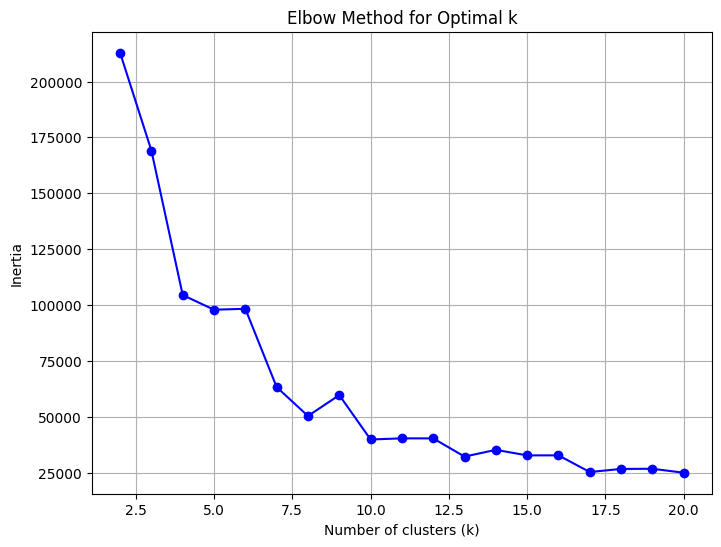

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [21]:
# 10 seems like a good clustering number
final_model = KMeansClustering(10)
model_ans = final_model.fit(train)
model_output = pd.DataFrame({'Id': ids,'Cluster': model_ans.squeeze()})
csv_file_path = r"C:\Users\ninja\OneDrive\Documents\Python\Machine Learning\predictions\k_means_clustering_10.csv"
model_output.to_csv(csv_file_path,index=False)